# Beam matching in a 4D ionization cooling 

In this example, we demonstrate a beam-matching method for a 4D transverse muon ionization cooling cell. The system consists of a solenoid beamline with a liquid hydrogen absorber located at the center of a 40 T CERN-design solenoid.

First, the beamline is constructed in a manner similar to the example notebook `000_solenoid_beamline.ipynb`. Next, the cylindrically symmetric Twiss functions of multiple reference particles are optimized in order to achieve the highest cooling performance. For more information, see Chapter 5 of this [literature](https://repositum.tuwien.at/handle/20.500.12708/219720).

<figure>
  <img src="4Dcooling.png" width="300">
</figure>

The figure illustrates a lateral cross-section of the solenoid system. A central **CERN-type high-field solenoid** in <span style="color:red;">red</span> is flanked by two **low-field solenoids**, **L1** (upstream) and **L2** (downstream) in <span style="color:darkorange;">orange</span>  . Between **L1** and the high-field solenoid, four **upstream matching coils** (**MU1–MU4**) in <span style="color:violet">violet</span> provide field transition and matching. Similarly, four **downstream matching coils** (**MD1–MD4**) sit between the high-field solenoid and **L2**. The low-field solenoids and matching coils are drawn with larger dimensions, consistent with the use of **conventional conductors**. Inside the high filed solenoid, there is a liquid hydrogen absorber placed, flanked by two LiH beam windows


## Creat beamline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import coolpy as cp

##############################################################
nSheet = 10 #Define the long, low field solenoid parameter 
L_radius_in = 0.1 #[m]
L_radius_out = 0.3 #[m]
L_offset = 0.0
L_Lsol = 1. #[m]
L_current_density = 17.  #[A/mm^2]
L_nSheet = nSheet
##############################################################
#Matcher parameters  
M_radius_in = 0.1 #[m]
M_radius_out = 0.3 #[m]
M_Lsol = 0.2
M_nSheet = nSheet
##############################################################
#CERN design high field solenoid parameters ##################
H_radius_in = 0.03 #[m]
H_radius_out = 0.09 #[m]
H_Lsol = 0.728 #[m]
H_current_density = 535.3 #A mm^-2
H_nSheet = nSheet
H_offset = 0
##### corrector length
Hcorr_Lsol = 0.012
#outer most down and up stream correctors
Hcorr1_radius_out = 0.135
Hcorr1_nSheet= nSheet
#middle down and up stream correctors
Hcorr2_radius_out = 0.125
Hcorr2_nSheet=nSheet
#inner most down and up stream correctors
Hcorr3_radius_out = 0.115
Hcorr3_nSheet=nSheet
##############################################################

In [2]:
#First low field solenoid 
L1_pos = 0 #[m]
L1 = cp.SolenoidSheet(current_density=L_current_density, radius_inner=L_radius_in, radius_outer=L_radius_out, rho=L_offset, L_sol=L_Lsol, nSheet=L_nSheet, position=L1_pos)

####___Matcher_coils_Upstream__________#######################
MU1_pos, MU2_pos, MU3_pos, MU4_pos  = 0.7, 1., 1.3, 1.6 #matcher positions [m]
JU = [10, 10, 10, 10,] #Initial matcher current densities
MU1 = cp.SolenoidSheet(current_density=JU[0], radius_inner=M_radius_in, radius_outer=M_radius_out, rho=0.0, L_sol=M_Lsol, nSheet=M_nSheet, position=MU1_pos)
MU2 = cp.SolenoidSheet(current_density=JU[1], radius_inner=M_radius_in, radius_outer=M_radius_out, rho=0.0, L_sol=M_Lsol, nSheet=M_nSheet, position=MU2_pos)
MU3 = cp.SolenoidSheet(current_density=JU[2], radius_inner=M_radius_in, radius_outer=M_radius_out, rho=0.0, L_sol=M_Lsol, nSheet=M_nSheet, position=MU3_pos)
MU4 = cp.SolenoidSheet(current_density=JU[3], radius_inner=M_radius_in, radius_outer=M_radius_out, rho=0.0, L_sol=M_Lsol, nSheet=M_nSheet, position=MU4_pos)

#CERN design high field solenoid##################################
H1_pos = 2.2 #[m] 
H1 = cp.SolenoidSheet(current_density=H_current_density, radius_inner=H_radius_in, radius_outer=H_radius_out, rho=H_offset, L_sol=H_Lsol, nSheet=H_nSheet, position=H1_pos)
H1corrU1_pos = H1.position - (H_Lsol*0.5 + Hcorr_Lsol*3) + Hcorr_Lsol*0.5
H1corrU1 = cp.SolenoidSheet(current_density=H_current_density, radius_inner=H_radius_in, radius_outer=Hcorr1_radius_out, rho=0.0, L_sol=Hcorr_Lsol, nSheet=Hcorr1_nSheet, position=H1corrU1_pos)
H1corrD1_pos = H1.position + (H_Lsol*0.5 + Hcorr_Lsol*3) - Hcorr_Lsol*0.5
H1corrD1 = cp.SolenoidSheet(current_density=H_current_density, radius_inner=H_radius_in, radius_outer=Hcorr1_radius_out, rho=0.0, L_sol=Hcorr_Lsol, nSheet=Hcorr1_nSheet, position=H1corrD1_pos)
H1corrU2_pos = H1.position - (H_Lsol*0.5 + Hcorr_Lsol*2) + Hcorr_Lsol*0.5
H1corrU2 = cp.SolenoidSheet(current_density=H_current_density, radius_inner=H_radius_in, radius_outer=Hcorr2_radius_out, rho=0.0, L_sol=Hcorr_Lsol, nSheet=Hcorr2_nSheet, position=H1corrU2_pos)
H1corrD2_pos = H1.position + (H_Lsol*0.5 + Hcorr_Lsol*2) - Hcorr_Lsol*0.5
H1corrD2 = cp.SolenoidSheet(current_density=H_current_density, radius_inner=H_radius_in, radius_outer=Hcorr2_radius_out, rho=0.0, L_sol=Hcorr_Lsol, nSheet=Hcorr2_nSheet, position=H1corrD2_pos)
H1corrU3_pos = H1.position - (H_Lsol*0.5 + Hcorr_Lsol*1) + Hcorr_Lsol*0.5
H1corrU3 = cp.SolenoidSheet(current_density=H_current_density, radius_inner=H_radius_in, radius_outer=Hcorr3_radius_out, rho=0.0, L_sol=Hcorr_Lsol, nSheet=Hcorr3_nSheet, position=H1corrU3_pos)
H1corrD3_pos = H1.position + (H_Lsol*0.5 + Hcorr_Lsol*1) - Hcorr_Lsol*0.5
H1corrD3 = cp.SolenoidSheet(current_density=H_current_density, radius_inner=H_radius_in, radius_outer=Hcorr3_radius_out, rho=0.0, L_sol=Hcorr_Lsol, nSheet=Hcorr3_nSheet, position=H1corrD3_pos)

####___Matcher_coils_Downstream__________#######################
MD1_pos, MD2_pos, MD3_pos, MD4_pos = 2.8, 3.1, 3.4, 3.7
JD = [10, 10, 10, 10]
MD1 = cp.SolenoidSheet(current_density=JD[0], radius_inner=M_radius_in, radius_outer=M_radius_out, rho=0.0, L_sol=M_Lsol, nSheet=M_nSheet, position=MD1_pos)
MD2 = cp.SolenoidSheet(current_density=JD[1], radius_inner=M_radius_in, radius_outer=M_radius_out, rho=0.0, L_sol=M_Lsol, nSheet=M_nSheet, position=MD2_pos)
MD3 = cp.SolenoidSheet(current_density=JD[2], radius_inner=M_radius_in, radius_outer=M_radius_out, rho=0.0, L_sol=M_Lsol, nSheet=M_nSheet, position=MD3_pos)
MD4 = cp.SolenoidSheet(current_density=JD[3], radius_inner=M_radius_in, radius_outer=M_radius_out, rho=0.0, L_sol=M_Lsol, nSheet=M_nSheet, position=MD4_pos)

#Second low field solenoid 
L2_pos = 4.4 #[m]
L2 = cp.SolenoidSheet(current_density=L_current_density, radius_inner=L_radius_in, radius_outer=L_radius_out, rho=L_offset, L_sol=L_Lsol, nSheet=L_nSheet, position=L2_pos)

In [3]:
#Construct beamline with coolpy 
M1UpList = [L1, MU1, MU2, MU3, MU4]
High1 = [H1corrU1, H1corrU2, H1corrU3, H1, H1corrD3, H1corrD2, H1corrD1]
M1DownList = [MD1, MD2, MD3, MD4, L2]

sol_list = []
sol_list.extend(M1UpList)
sol_list.extend(High1)
sol_list.extend(M1DownList)

mag_field = cp.MagneticField()
[mag_field.add_solenoid(solenoid) for solenoid in sol_list];

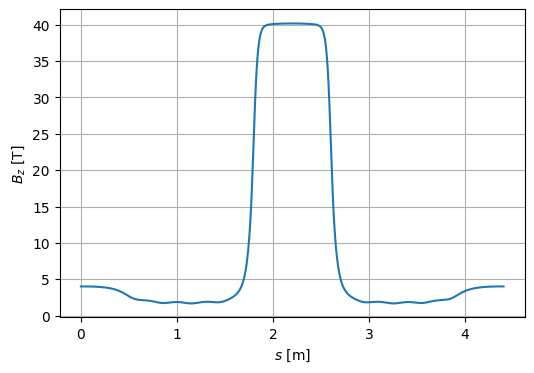

In [4]:
#check on-axis magnetic longitudinal magnetic field 
s = np.linspace(0.,L2_pos, 501)
Bz= mag_field.superposed_field_z(s)

plt.figure(figsize=(6, 4))
plt.plot(s, Bz )
plt.xlabel(r'$s$ [m]')
plt.ylabel(r'$B_z$ [T]')
plt.grid(True)

As the reference particles pass through the absorber region, they are slowed down due to energy loss. Stochastic effects within the absorber are neglected in this model. The reference momenta used in the following steps are loaded from a G4Beamline tracking simulation.

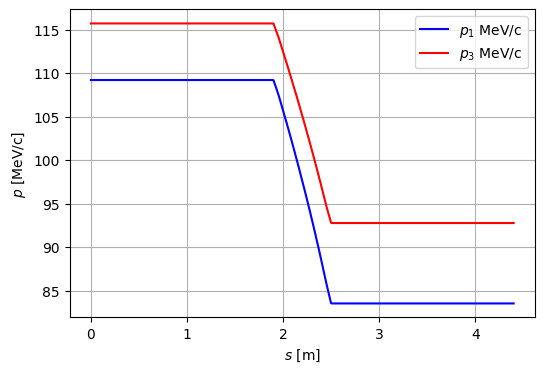

In [5]:
#Get refernce particles
data = np.loadtxt('FOR009_RefMomenta.txt') #for009 format, see ICOOL reference manuel for more info
IEVT, z, pz  = data[:,0], data[:,8], data[:,11] #particle id, longitudinal position in [m], particle momentum [GeV/c]

evt_ids = [1, 2]
colors  = ["b", "r"]

p_dict = {}          # will store p-arrays: p_dict[1], p_dict[3]
for evt, col in zip(evt_ids, colors):
    mask = (IEVT == evt)
    p = np.interp(s, z[mask], pz[mask])
    p_dict[evt] = p   # <-- store it

p1 = p_dict[1]
p3 = p_dict[2]

plt.figure(figsize=(6, 4))
plt.plot(s, p1*1e3, color=colors[0], label=f'$p_1$ MeV/c')
plt.plot(s, p3*1e3, color=colors[1], label=f'$p_3$ MeV/c')
plt.legend(loc='best')
plt.xlabel(r'$s$ [m]')
plt.ylabel(r'$p$ [MeV/c]')
plt.grid(True)

Knowing the on-axis longitudinal magnetic field of the beamline and the properties of the reference particles, it is possible to evaluate the Twiss parameters for each reference particle. The `coolpy` function `solve_beta_rk4` solves the transverse beam-envelope equation

$$
2 \beta_\perp \beta_\perp^{\prime\prime}
+ \left(\beta_\perp^{\prime}\right)^2
+ 4 \beta_\perp^2 \kappa^2
- 4 \left(1 + \mathcal{L}^2\right)
= 0 ,
$$

where $\beta_\perp$ is the transverse Twiss beta function, primes denote derivatives with respect to the longitudinal coordinate, and $\mathcal{L}$ is the normalized canonical angular momentum.

The function requires the initial Twiss parameters $\beta_\perp$ and $\beta_\perp^\prime$, the particle momentum, and the focusing strength

$$
\kappa \approx 0.15 \, \frac{B\,[\mathrm{T}]}{p\,[\mathrm{GeV}/c]} .
$$


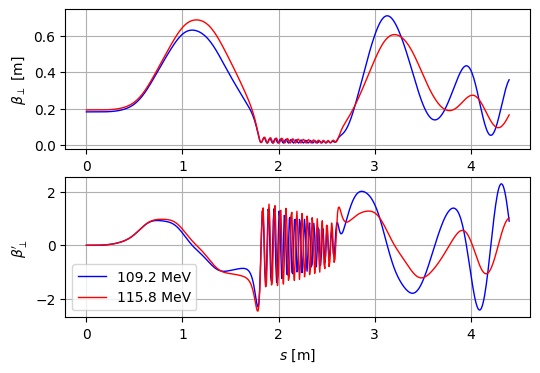

In [6]:
plt.figure(figsize=(6, 4))
for evt, col in zip(evt_ids, colors):
    mask = (IEVT == evt)
    p = np.interp(s, z[mask], pz[mask])
    kappa = np.abs(cp.Gc_2 * Bz / p)
    b0 = [1.0 / kappa[0], 0.0]
    sol = cp.solve_beta_rk4(s,kappa,beta0=b0[0],betap0=b0[1],L=0.0)
    plt.subplot(211)
    plt.plot(s, sol[:, 0], lw=1, c=col)
    plt.subplot(212)
    plt.plot(s,sol[:, 1],lw=1,c=col,label=f"{np.round(p[0]*1e3, 1)} MeV")

plt.subplot(211)
plt.ylabel(r'$\beta_\perp$ [m]')
plt.grid(True)

plt.subplot(212)
plt.ylabel(r'$\beta_{\perp}^{\prime}$')
plt.xlabel(r'$s$ [m]')
plt.legend(loc='best')
plt.grid(True)

For a matched beam in a solenoidal channel, the betatron function has zero correlation,
$\beta_\perp^{\prime} = 0$, and therefore

$$
\beta_{\perp} = \frac{1}{\kappa}\,\sqrt{1 + \mathcal{L}^2}.
$$

The goal of this beamline is to achieve these matching conditions at the centers of **L1**, the absorber in **H1**, and **L2**. The beam is initialized in **L1** with
$\beta_{\perp} = 1/\kappa$ (corresponding to $\mathcal{L} = 0$) and
$\beta_{\perp}^{\prime} = 0$.
However, after propagation through the beamline, the Twiss functions become clearly mismatched in **H1** and **L2**.

To match the Twiss parameters between two regions, two independent free parameters are required. For two reference particles, this results in four independent matching conditions. In this example, we therefore employ four matching solenoids located between the regions to achieve the desired beam matching and try to find the idealized current densities for these matchers.

The goal is to find the reference momenta at specific points in the target areas **H1**, and **L2**.


In [7]:
#We evaluate the target momenta at several points around the centers H1 and L2
points_H1 = np.array([H1_pos-0.1, H1_pos-0.05, H1_pos, H1_pos+0.05, H1_pos+0.1]) #some central points of H1
points_L2 = np.array([L2_pos-0.1, L2_pos-0.05, L2_pos, L2_pos+0.05, L2_pos+0.1]) #some central points of L2

p_dict_points_H1 = {}
p_dict_points_L2 = {}
for evt, col in zip(evt_ids, colors):
    mask = (IEVT == evt)
    p_points_ = np.interp(points_H1, z[mask], pz[mask] )
    p_dict_points_H1[evt] = p_points_
    
    p_points_ = np.interp(points_L2, z[mask], pz[mask] )
    p_dict_points_L2[evt] = p_points_
    
p1_points_H1=p_dict_points_H1[1]
p3_points_H1=p_dict_points_H1[2]

p1_points_L2=p_dict_points_L2[1]
p3_points_L2=p_dict_points_L2[2]


## The optimization
We now turn to the main topic of this exercise: the optimization of the matching coils. We begin by optimizing the current densities of **MU1–MU4**. The goal is to achieve

$$
\beta_{\perp,0} = \frac{p_z}{0.15\,B}
$$

at the center of **H1**. To this end, we define an `objective` function that evaluates an error value.

The error is defined as the following cost function:

$$
\text{err} = \sum_i \left(
\left[ \beta_{\perp,0}(s_i) - \beta_{\perp}(s_i) \right]^2
+ \left[ \mathcal{W}\,\beta_{\perp}^\prime(s_i) \right]^2
\right).
$$

Here, $\beta_{\perp}(s_i)$ and $\beta_{\perp}^\prime(s_i)$ denote the predicted Twiss parameters, while $\beta_{\perp,0}(s_i)$ and $\beta_{\perp,0}^\prime(s_i)$ represent the target values at one or more longitudinal positions $s_i$. A weight factor $\mathcal{W}$ is introduced for the betatron correlation term $\beta_{\perp}^\prime(s_i)$ to ensure stable and optimal convergence of the matching procedure. In this study, a value of

$$
\mathcal{W} = 100
$$

is used.

In [8]:
particles = [
    dict(p=p1, p_points=p1_points_H1),
    dict(p=p3, p_points=p3_points_H1),
]

W = 100 #weight factor 
      
def solve_ode(B_superposed, Momentum, beta_initial):
    kappa = np.abs(cp.Gc_2 * B_superposed / Momentum)
    sol = cp.solve_beta_rk4(s, kappa,beta0=beta_initial[0],betap0=beta_initial[1],L=0.0)
    return sol[:, 0], sol[:, 1]

inv_Gc2 = 1.0 / cp.Gc_2 #Gc_2 == speed of light c * 0.5 * 1e-9
def objective(params, points):
    objective.counter += 1 #count the number of iterations

    MU1.current_density = params[0]
    MU2.current_density = params[1]
    MU3.current_density = params[2]
    MU4.current_density = params[3]
 
    Bz = mag_field.superposed_field_z(s) #Evaluate actual Bz
    B_start  = Bz[0]
    B_points = np.interp(points_H1, s, Bz) #Evaluate Bz at target points
    inv_B_points = 1.0 / B_points
    err = 0.0
    for part in particles:
        p = part["p"]
        p_points = part["p_points"]

        # initial beta from on-axis field
        kappa0 = abs(cp.Gc_2 * B_start / p[0])
        b0 = [1.0 / kappa0, 0.0]
        b1, b2 = solve_ode(Bz, p, b0)

        # target beta at points
        beta0_ideal = abs(p_points * inv_Gc2 * inv_B_points) #Target Twiss beta
                                                             #Target Twiss beta' = 0 
        # interpolate solution to points
        b1_at_pts = np.interp(points_H1, s, b1) #Evaluate actual Twiss beta at target points
        b2_at_pts = np.interp(points_H1, s, b2) #Evaluate actual Twiss beta' at target points

        # error contribution
        err += ( np.sum((beta0_ideal - b1_at_pts) ** 2) + np.sum((W * np.abs(b2_at_pts)) ** 2) )
        
    if objective.counter % 100 == 0: #!optional!
        print(params.tolist(), err)  #print J and error every 100th iteration 
        
    return err

### Nelder–Mead Optimization

To minimize the cost function, we use the Nelder–Mead optimization algorithm. In order to accelerate the optimization, the `coolpy` function `nelder_mead` is implemented.

First, we define an initial guess for the current densities of the matching solenoids. Next, we specify the boundary conditions for the optimization parameters. The target locations along the beamline are then provided to the optimizer, together with the maximum number of iterations and the convergence tolerances.


In [9]:
objective.counter = 0 #for the start of the interation

initial_guess = [MU1.current_density, MU2.current_density, MU3.current_density, MU4.current_density]
bounds = [
    (-60, 130),  # MU1.current_density
    (-60, 110),  # MU2.current_density
    (-60, 110),  # MU3.current_density
    (-60, 110),  # MU4.current_density
]

result = cp.nelder_mead(
    objective,
    np.array(initial_guess, dtype=float),
    args=(points_H1,),
    bounds=bounds,
    max_iter=1000,
    tol_f=1e-4,
    tol_x=1e-4,
)

optimized_params = result['x'].tolist()
print(optimized_params)

[14.109563705871578, 4.2546768678877305, 11.720921114015987, 16.256533633420066] 1133.7880145455288
[18.949777457877442, 6.076332717786961, 11.603745563981132, 19.18832191968145] 472.83494649381373
[13.136241774817591, 13.127065216068292, 4.850091259507755, 24.82596422801707] 28.747379221290213
[9.026136492523287, 15.767687845862756, 0.5977832751911277, 25.697992272485116] 0.3238412451646416
[9.012887378211477, 15.764369415331027, 0.5845637689863602, 25.684864216162126] 0.26990336509114204
[9.012540649431223, 15.764659356985561, 0.5841880724854619, 25.68497900069522]


We can check the results and we will see the optimized area in the **H1**.

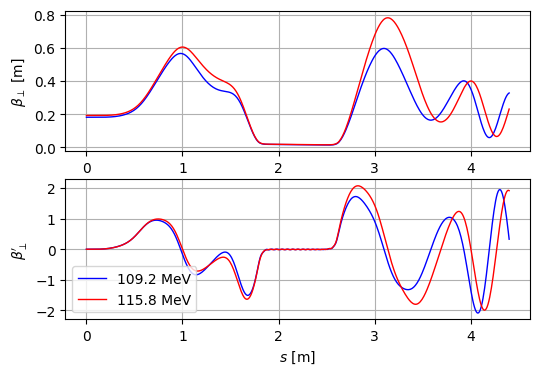

In [10]:
MU1.current_density = optimized_params[0]
MU2.current_density = optimized_params[1]
MU3.current_density = optimized_params[2]
MU4.current_density = optimized_params[3]
Bz= mag_field.superposed_field_z(s)

plt.figure(figsize=(6, 4))
for evt, col in zip(evt_ids, colors):
    mask = (IEVT == evt)
    p = np.interp(s, z[mask], pz[mask])
    kappa = np.abs(cp.Gc_2 * Bz / p)
    b0 = [1.0 / kappa[0], 0.0]
    sol = cp.solve_beta_rk4(s,kappa,beta0=b0[0],betap0=b0[1],L=0.0)
    plt.subplot(211)
    plt.plot(s, sol[:, 0], lw=1, c=col)
    plt.subplot(212)
    plt.plot(s,sol[:, 1],lw=1,c=col,label=f"{np.round(p[0]*1e3, 1)} MeV")

plt.subplot(211)
plt.ylabel(r'$\beta_\perp$ [m]')
plt.grid(True)

plt.subplot(212)
plt.ylabel(r'$\beta_{\perp}^{\prime}$')
plt.xlabel(r'$s$ [m]')
plt.legend(loc='best')
plt.grid(True)

 It can be observed that a small residual oscillation of $\beta_\perp^\prime$ remains in the lower plot. The user may re-run the optimization using different initial guesses to further improve the matching.


### Optimization of L2

Here, the previously defined `objective` function can be reused and adapted for the second set of matching solenoids, **MD1–MD4**. The target points `points_L2` are defined in the second low-field solenoid, **L2**, and passed to the optimizer accordingly.


In [11]:
particles = [
    dict(p=p1, p_points=p1_points_L2),
    dict(p=p3, p_points=p3_points_L2),
]

inv_Gc2 = 1.0 / cp.Gc_2
def objective(params, points):
    objective.counter += 1

    MD1.current_density = params[0]
    MD2.current_density = params[1]
    MD3.current_density = params[2]
    MD4.current_density = params[3]
 
    Bz = mag_field.superposed_field_z(s)
    B_start  = Bz[0]
    B_points = np.interp(points_L2, s, Bz) 
    inv_B_points = 1.0 / B_points
    err = 0.0
    for part in particles:
        p = part["p"]
        p_points = part["p_points"]

        # initial beta from on-axis field
        kappa0 = abs(cp.Gc_2 * B_start / p[0])
        b0 = [1.0 / kappa0, 0.0]
        b1, b2 = solve_ode(Bz, p, b0)

        # target beta at points
        beta0_ideal = abs(p_points * inv_Gc2 * inv_B_points)

        # interpolate solution to points
        b1_at_pts = np.interp(points_L2, s, b1)
        b2_at_pts = np.interp(points_L2, s, b2)

        # error contribution
        err += ( np.sum((beta0_ideal - b1_at_pts) ** 2) + np.sum((W * np.abs(b2_at_pts)) ** 2) )
        
    if objective.counter % 100 == 0:
        print(params.tolist(), err)
        
    return err

In [12]:
objective.counter = 0

initial_guess = [MD1.current_density, MD2.current_density, MD3.current_density, MD4.current_density]
bounds = [
    (-60, 130),  # MU1.current_density
    (-60, 110),  # MU2.current_density
    (-60, 110),  # MU3.current_density
    (-60, 110),  # MU4.current_density
]
options = {'maxiter': 1000}

result = cp.nelder_mead(
    objective,
    np.array(initial_guess, dtype=float),
    args=(points_H1,),
    bounds=bounds,
    max_iter=1000,
    tol_f=1e-4,
    tol_x=1e-4,
)

optimized_params = result['x'].tolist()
print(optimized_params)

[16.127612813665575, 5.276477963202611, 9.194032564100219, 9.434798181985059] 54.56982403881841
[16.666742595043125, 5.163020615881659, 9.399332076029758, 9.65776704042055] 0.015403941668339072
[16.66604459863784, 5.162562312933921, 9.399389251612124, 9.65694885092457]


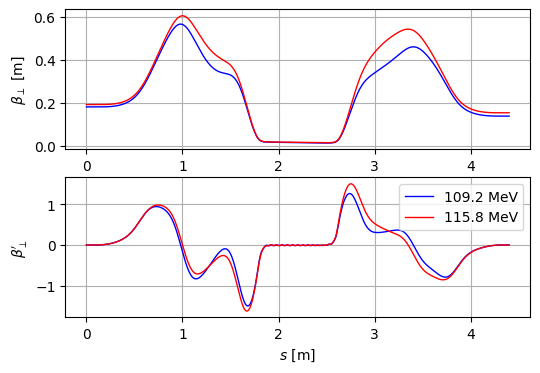

In [13]:
MD1.current_density = optimized_params[0]
MD2.current_density = optimized_params[1]
MD3.current_density = optimized_params[2]
MD4.current_density = optimized_params[3]
Bz= mag_field.superposed_field_z(s)

plt.figure(figsize=(6, 4))
for evt, col in zip(evt_ids, colors):
    mask = (IEVT == evt)
    p = np.interp(s, z[mask], pz[mask])
    kappa = np.abs(cp.Gc_2 * Bz / p)
    b0 = [1.0 / kappa[0], 0.0]
    sol = cp.solve_beta_rk4(s,kappa,beta0=b0[0],betap0=b0[1],L=0.0)
    plt.subplot(211)
    plt.plot(s, sol[:, 0], lw=1, c=col)
    plt.subplot(212)
    plt.plot(s,sol[:, 1],lw=1,c=col,label=f"{np.round(p[0]*1e3, 1)} MeV")

plt.subplot(211)
plt.ylabel(r'$\beta_\perp$ [m]')
plt.grid(True)

plt.subplot(212)
plt.ylabel(r'$\beta_{\perp}^{\prime}$')
plt.xlabel(r'$s$ [m]')
plt.legend(loc='best')
plt.grid(True)

We achieve constant Twiss functions in **L1**, **H1**, and **L2**, which means that the beamline is fully matched.

### Final comments on $\mathcal{L}$

In this example, we assume $\mathcal{L} = 0$. In practice, $\mathcal{L}$ changes when the beam passes through the absorber. However, these changes are small, and therefore the approximation
$$
\sqrt{1 + \mathcal{L}^2} \approx 1
$$
is valid. If $\mathcal{L}$ is of order unity ($\mathcal{L} \approx 1$) or larger ($\mathcal{L} \ge 1$), it must be explicitly included in the matching procedure.
